In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv("tesla_stock_price_14_years.csv")

In [4]:
df.shape

(3313, 7)

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,30-06-2010,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,01-07-2010,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,02-07-2010,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,06-07-2010,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [6]:
df.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3308,False,False,False,False,False,False,False
3309,False,False,False,False,False,False,False
3310,False,False,False,False,False,False,False
3311,False,False,False,False,False,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3313 non-null   object 
 1   Open       3313 non-null   float64
 2   High       3313 non-null   float64
 3   Low        3313 non-null   float64
 4   Close      3313 non-null   float64
 5   Adj Close  3313 non-null   float64
 6   Volume     3313 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 181.3+ KB


In [6]:
pd.isnull(df).sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3.313000e+03
mean,62.179441,63.490642,60.722337,62.128871,62.128871,9.748892e+07
std,89.909710,91.766357,87.746432,89.748971,89.748971,8.090489e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,9.986667,10.228667,9.750000,9.957333,9.957333,4.520700e+07
50%,16.680000,16.933332,16.440666,16.694000,16.694000,8.253750e+07
75%,54.811333,55.639999,53.591999,54.370666,54.370666,1.249485e+08
max,331.809998,333.333344,297.796661,299.980011,299.980011,9.140820e+08


3313


Text(0.5, 0, 'Closing Price ($)')

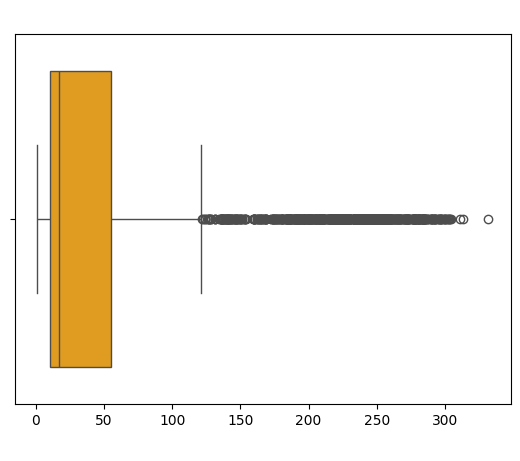

In [9]:
sns.boxplot(x=df['Open'], color='orange')

# Add title and labels
print(len(df))
plt.title('Boxplot of Tesla Opening Prices', fontsize=16, color='white')
plt.xlabel('Closing Price ($)', fontsize=12, color='white')

Text(0, 0.5, 'Closing Price ($)')

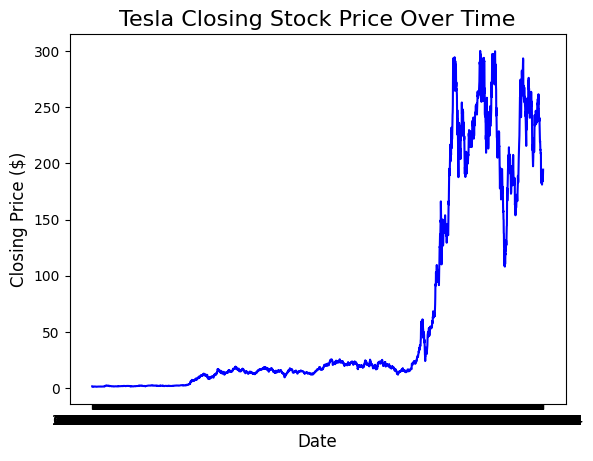

In [16]:
sns.lineplot(data=df, x='Date', y='Close', color='blue')
plt.title('Tesla Closing Stock Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price ($)', fontsize=12)

Text(0, 0.5, 'Frequency')

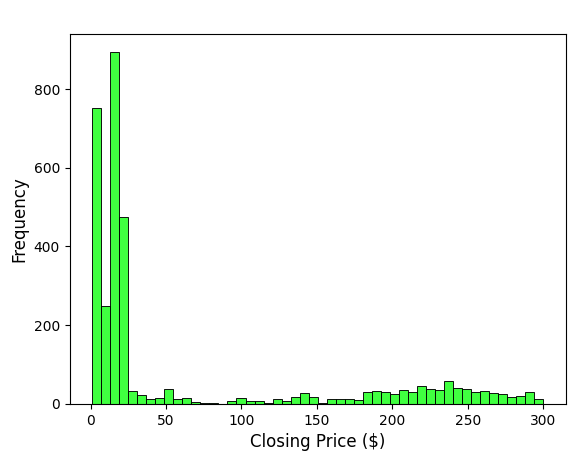

In [14]:
sns.histplot(df['Close'], bins=50, color='lime', edgecolor='black')
plt.title('Distribution of Tesla Closing Prices', fontsize=16, color='white')
plt.xlabel('Closing Price ($)', fontsize=12, color='black')
plt.ylabel('Frequency', fontsize=12, color='black')


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Open'),
  Text(0, 1.5, 'High'),
  Text(0, 2.5, 'Low'),
  Text(0, 3.5, 'Close'),
  Text(0, 4.5, 'Volume')])

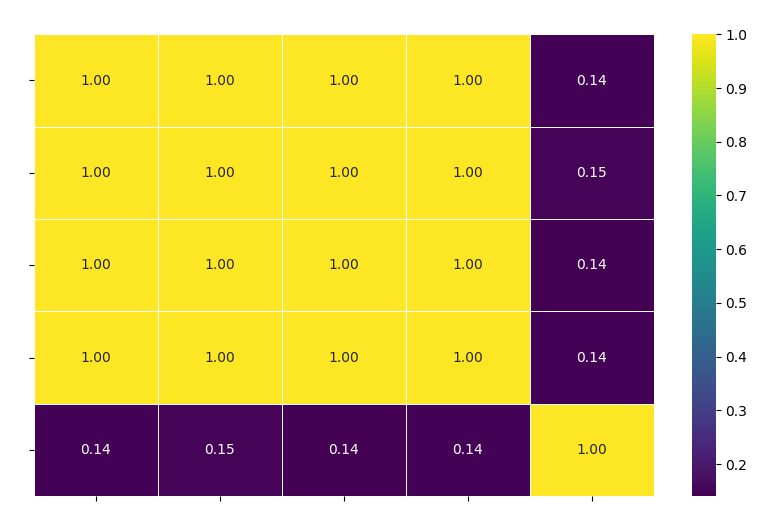

In [17]:
corr_features = df[['Open', 'High', 'Low', 'Close', 'Volume']]
corr_matrix = corr_features.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Tesla Stock Features', fontsize=16, color='white')
plt.xticks(color='white')
plt.yticks(color='white')

T-test Results:
T-statistic: -0.3428
P-value: 0.7318
👉 No significant difference in average closing prices.


Text(0, 0.5, 'Average Close Price ($)')

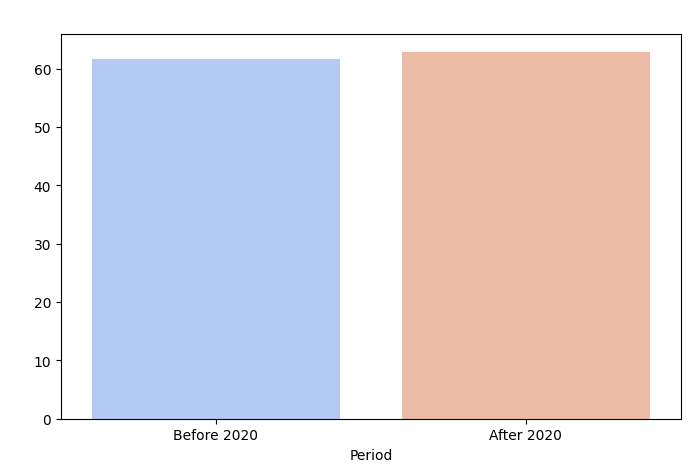

In [36]:
before_2020 = df[df['Date'] < '2020-01-01']['Close']
after_2020 = df[df['Date'] >= '2020-01-01']['Close']

# Mean values
mean_before = before_2020.mean()
mean_after = after_2020.mean()

# Hypothesis test
t_stat, p_value = stats.ttest_ind(before_2020, after_2020, equal_var=False)

# Show test results
print("T-test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("👉 Significant difference in average closing prices.")
else:
    print("👉 No significant difference in average closing prices.")

# Create a DataFrame for bar plot
avg_df = pd.DataFrame({
    'Period': ['Before 2020', 'After 2020'],
    'Average_Close': [mean_before, mean_after]
})

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_df, x='Period', y='Average_Close',hue='Period', legend=False, palette='coolwarm')

# Title and labels
plt.title('Average Closing Price Before vs After 2020', fontsize=16, color='white')
plt.ylabel('Average Close Price ($)', fontsize=12, color='white')

Text(0, 0.5, 'Price ($)')

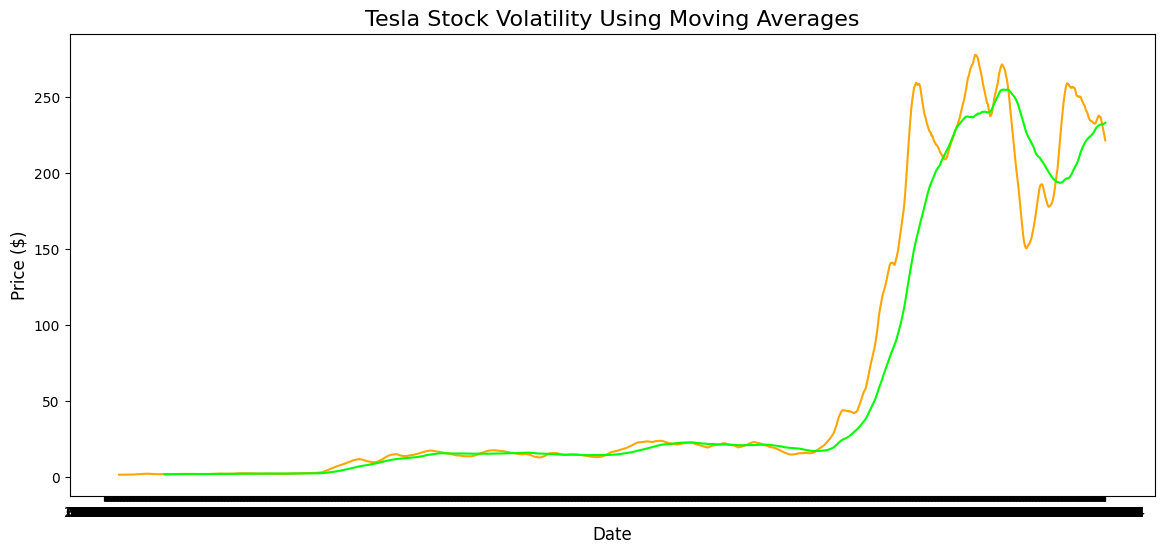

In [33]:
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['MA50'], label='50-Day MA', color='orange')
plt.plot(df['Date'], df['MA200'], label='200-Day MA', color='lime')

# Title and labels
plt.title('Tesla Stock Volatility Using Moving Averages', fontsize=16, color='black')
plt.xlabel('Date', fontsize=12, color='black')
plt.ylabel('Price ($)', fontsize=12, color='black')

Text(0, 0.5, 'Volume Traded')

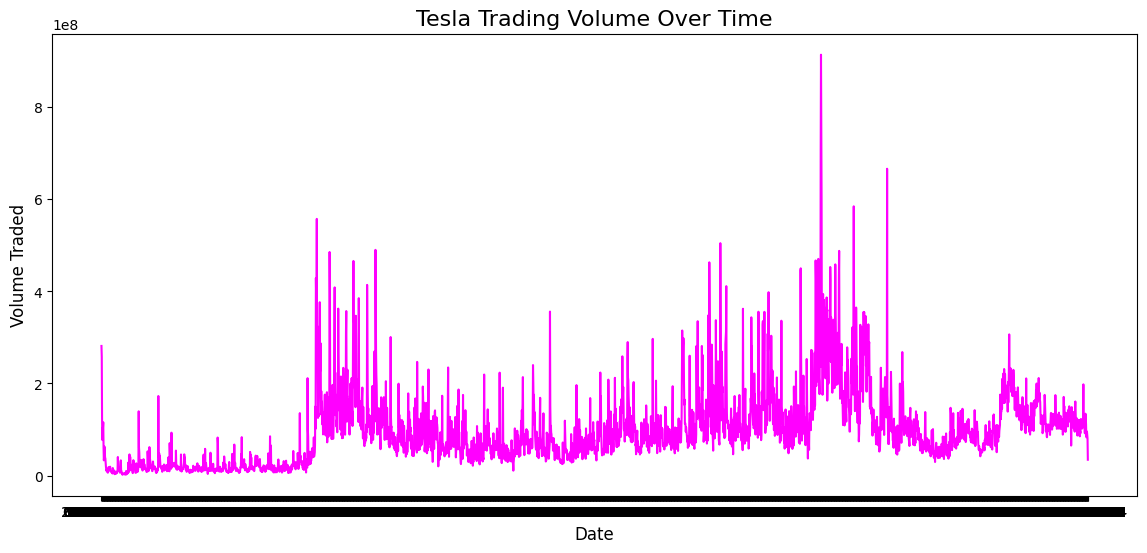

In [41]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Date', y='Volume', color='magenta')

# Title and labels
plt.title('Tesla Trading Volume Over Time', fontsize=16, color='black')
plt.xlabel('Date', fontsize=12, color='black')
plt.ylabel('Volume Traded', fontsize=12, color='black')

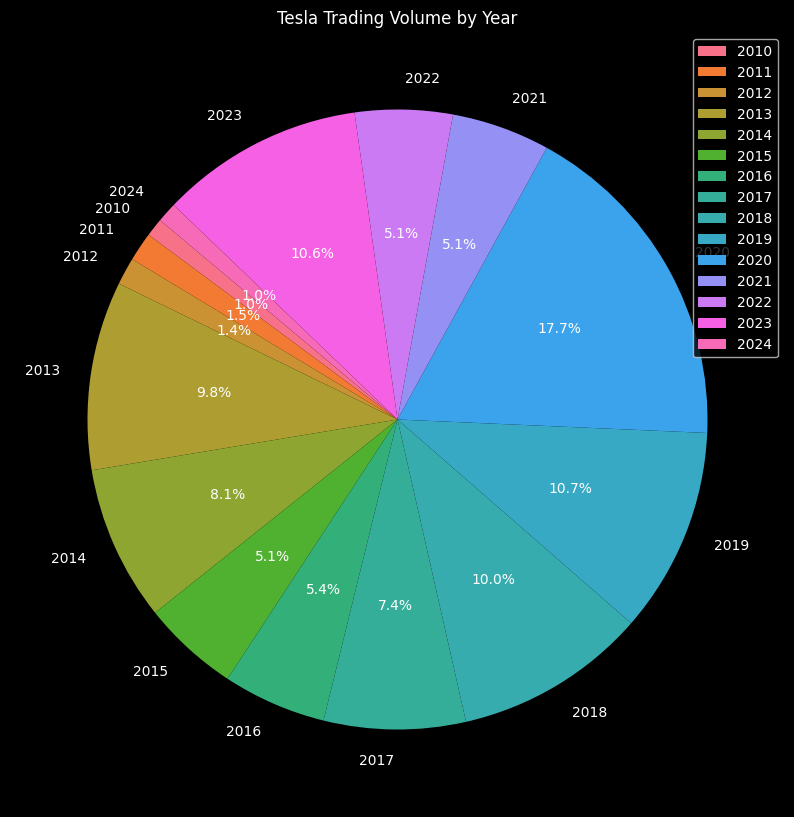

In [56]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year
df['Year'] = df['Date'].dt.year

# Group by year and sum trading volume
volume_by_year = df.groupby('Year')['Volume'].sum()

# Plot pie chart
plt.figure(figsize=(10, 13))
plt.style.use('dark_background')
plt.pie(volume_by_year, labels=volume_by_year.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("husl", len(volume_by_year)))
plt.title('Tesla Trading Volume by Year', color='white')
plt.legend()